<a href="https://colab.research.google.com/github/ch00226855/CMP414765Fall2022/blob/main/Week02_FirstExample_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2: First Machine Learning Example

**Reading**: Chapter 1. The Machine Learning Landscape



## What is Machine Learning?

Machine Learning is the science of programming computers so they can perform certain task with knowledge learned from data.

**Example: spam filter**
- Task: to flag spam for new emails
- Data: existing emails with labels (either spam or non-spam)
- Performance measure:
    - percentage of correctly labeled emails
    - percentage of a spam email being labeled correctly.
    - percentage of a non-spam email being labeled correctly.
    - Classification efficiency
    - ...

## Why Use Machine Learning?

Traditional approach for spam filter:
1. Choose features of spam emails manually: "4U", "credit card", "free", "amazing"
2. Write an program to detect exactly the features you chose
3. Test the program and modify the features until satisfactory

Drawbacks of traditional approach: 
1. A large amount of features are needed - hard to maintain
2. Spammers may change their writing to avoid explicit rules: change "4U" to "For U".
3. For some complex problems, manually-engineered features are not good enough: hand-written digits

Machine Learning models:
1. Automatically learns which words and phrases are good predictors of spam. 
2. Since the program is not a stack of explicit rules, it is much shorter, easier to maintain, and most likely more accurate.
3. With new training data, the Machine Learning model can update automatically to capture new indicators of spam emails.

What Machine Learning is great for:
1. Problems for which existing solutions require a lot of hand-tuning or long lists of rules: one Machine Learning algorithm can often simplify code and perform better.
2. Complex problems for which there is no good solution at all using a traditional approach: the best Machine Learning techniques can find a solution.
3. Fluctuating environments: a Machine Learning system can adapt to new data.
4. Large amount of data: With Machine Learning, computers process big data faster than human.


## First Example: Men's Height in the United States

As an illustration of machine learning practice, let's consider the task of understanding the trend of American men's height in the 20th century. This project requires the following stages:
- Data preparation
- Data exploration
- Model training
- Model evaluation
- Model application

### 1. Download Data
- Go to website:  https://ourworldindata.org/human-height
- Find the interactive chart "Increase of human height over two centuries"
- Click the "Download" tab, and download the CSV (comma-separated-values) file containing height data.

After downloading, you can open it a text editor to view its content.

### 2. Upload the CSV file to Google Colab
- Click "Files" icon on the left column.
- Click "Upload to session storage"
- Upload the CSV file.

Afterwards, you should see the file listed in the files tab.


### 3. Load Data into Python
- Import numpy, pandas, and matplotlib.
- Load the data as a DataFrame using the following statement:
`raw_data = pd.read_csv(filename, sep=',')`

Now the data in the .csv file are loaded to the DataFrame `raw_data`. You can display its first 5 rows using `raw_data.head()`.

In [1]:
import numpy as np  # scientific computation
import pandas as pd  # data handling
import matplotlib.pyplot as plt  # plotting
# The following "magic command" allows figures to be displayed automatically in notebook
%matplotlib inline  

In [2]:
raw_data = pd.read_csv("average-height-of-men-for-selected-countries.csv")

In [ ]:
# The read_csv method creates a data frame object with data from the CSV file
# Use ? to detect the type of an objects
?raw_data 

In [ ]:
raw_data.head() # The head() method display the first several rows of the data frame

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
0,Afghanistan,AFG,1870,168.4
1,Afghanistan,AFG,1880,165.7
2,Afghanistan,AFG,1930,166.8
3,Albania,ALB,1880,170.1
4,Albania,ALB,1890,169.8


In [ ]:
raw_data.tail()

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
1245,Zimbabwe,ZWE,1900,167.6
1246,Zimbabwe,ZWE,1950,171.0
1247,Zimbabwe,ZWE,1960,171.1
1248,Zimbabwe,ZWE,1970,171.3
1249,Zimbabwe,ZWE,1980,171.0


### DataFrame
Data frame is a way to store data in rectangular grids that can easily be overviewed. Each row of these grids corresponds to measurements or values of an instance, while each column is a vector containing data for a specific variable. A data frame's row may contain different types of values: numeric, character, logical, etc.

Data frames in Python come with the Pandas libarary, and they are defined as a two-dimensional labeled data structures with columns of potentially different types.

In [ ]:
# Explore the raw data set
raw_data.shape # (1250, 4) -> 1250 rows, 4 columns

(1250, 4)

In [ ]:
raw_data.columns

Index(['Entity', 'Code', 'Year',
       'Human Height (University of Tuebingen (2015))'],
      dtype='object')

In [ ]:
raw_data.dtypes # object -> strings, int64 -> integers, float64 -> decimals

Entity                                            object
Code                                              object
Year                                               int64
Human Height (University of Tuebingen (2015))    float64
dtype: object

### 4. Extract US Data
- Create a filter on the rows with condition "Entity = United States"
- Use the filter to select rows related to US.
- Create another filter with condition "Year >= 1900", and use it to filter the data.
- Display the resulting data frame.

In [3]:
filter1 = (raw_data['Entity'] == "United States")
print(filter1)

0       False
1       False
2       False
3       False
4       False
        ...  
1245    False
1246    False
1247    False
1248    False
1249    False
Name: Entity, Length: 1250, dtype: bool


In [4]:
filter1 = (raw_data['Entity'] == "United States")
data = raw_data[filter1]
data # data is a much smaller data frame containing the US data

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
1194,United States,USA,1820,172.2
1195,United States,USA,1830,173.5
1196,United States,USA,1840,172.2
1197,United States,USA,1850,171.1
1198,United States,USA,1860,170.6
1199,United States,USA,1870,171.1
1200,United States,USA,1880,169.5
1201,United States,USA,1890,169.1
1202,United States,USA,1900,170.0
1203,United States,USA,1910,172.1


In [ ]:
# You can combine the two steps in one statement
data = raw_data[raw_data['Entity'] == "United States"]
data.head()

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
1194,United States,USA,1820,172.2
1195,United States,USA,1830,173.5
1196,United States,USA,1840,172.2
1197,United States,USA,1850,171.1
1198,United States,USA,1860,170.6


In [7]:
# Exercise:
# Extract USA data since 1900.
data = data[data['Year'] >= 1900]
data

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
1202,United States,USA,1900,170.0
1203,United States,USA,1910,172.1
1204,United States,USA,1920,173.1
1205,United States,USA,1930,173.4
1206,United States,USA,1940,176.1
1207,United States,USA,1950,177.1
1208,United States,USA,1960,177.3
1209,United States,USA,1970,178.3
1210,United States,USA,1980,179.0


### 5. Clean the Dataset
1. Reset the index.
2. Remove Entity and Code column.
3. Give a proper name to height column

In [8]:
data = data.set_index(["Year"])
data.head()

,Entity,Code,Human Height (University of Tuebingen (2015))
Year,,,
1900,United States,USA,170.0
1910,United States,USA,172.1
1920,United States,USA,173.1
1930,United States,USA,173.4
1940,United States,USA,176.1


In [9]:
data.drop(['Entity', 'Code'], axis=1, inplace=True) # axis specifies row drop or column drop
data.head()

,Human Height (University of Tuebingen (2015))
Year,
1900,170.0
1910,172.1
1920,173.1
1930,173.4
1940,176.1


In [10]:
data = data.rename(columns={'Human Height (University of Tuebingen (2015))': "Height(cm)"})
# data.tail()
data

,Height(cm)
Year,
1900,170.0
1910,172.1
1920,173.1
1930,173.4
1940,176.1
1950,177.1
1960,177.3
1970,178.3
1980,179.0


In [ ]:
data.columns # "Year" is no longer considered as a column

Index(['Height(cm)'], dtype='object')

### 6. Plot height vs. year
- Extract the list of heights.
- Extract the list of years.
- Use `plt.plot()` to create a scatter plot.

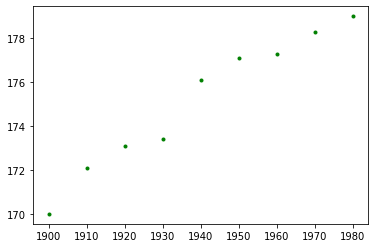

In [11]:
heights = data['Height(cm)']
years = data.index
plt.plot(years, heights, 'g.')

**How would you describe the trend?**
1. Is there a trend?

Answer: Yes
2. Is the trend upward or downward?

Answer: There is an increasing trend.
3. It the trend consistent?

Answer:The trend is flat during 1920s and 1950s. The increase is sharp during the 1930s.

**Conclusion**: The trend closely follows a straight line.

## 7. Modeling

Since we haven't studied any modeling method yet, let's use our intuition to find a function that describes the relation between year and height.
- Linear model ($height = m \cdot year + b$) seems a good fit to the data.
- What is a good value for $m$?
- What is a good value for $b$?
- Plot the line represented by the linear model
    - Create a list of x-coordinates using `np.linspace`
    - Calculate the corresponding y-coordinates
    - Use these two lists to plot the line.

In [12]:
# Calculate the average increase per year between 1900 and 1980

m1 = (data.loc[1980, 'Height(cm)'] - data.loc[1900, 'Height(cm)']) / (1980 - 1900)
print("Slope:", m1)

Slope: 0.1125


In [13]:
# Let the slope be the average rate of increase.
# If the model is height = m * year + b, 
# find the value of b so that point (1900, 170.0) lies on the line.

b1 = 170 - m1 * 1900
print(b1)

-43.75


Based on our discussion, the model is:

Height = 0.1125 * Year - 43.75.

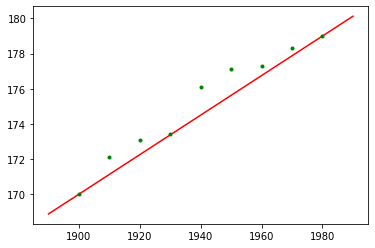

In [14]:
# Plot the model line.
x_coordinates = [1890, 1990]
y_coordinates = []
for year in x_coordinates:
    y_coordinates.append(m1 * year + b1)

plt.plot(x_coordinates, y_coordinates, "r-") # - means a straight line connects all points
plt.plot(years, heights, 'g.')

**Can you find another line that fits the model better?**

In [ ]:
m2 = 0.1125
b2 = -43
# Plot the model line with the data points




In [ ]:
# What are the model's prediction for 1930?



In [ ]:
# Display the error made on 1900, 1910, 1920, ..., 1980
for year in data.index:
    pass

Let's use tools from the Sci-Kit Learn library to find a line that fits the data set.

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data.index.values.reshape(-1, 1), data['Height(cm)'])
# .values turns the index to a 1D array
# .reshape(-1, 1) turns the 1D array to a 2D array

LinearRegression()

In [23]:
# Let's read the official documentation of the LinearRegression class
# Find the slope and the y-intercept of this line.
m3 = model.coef_[0]
b3 = model.intercept_
print("slope:", m3, "y-intercept:", b3)

slope: 0.11116666666666676 y-intercept: -40.50777777777796


[169.59722222222223, 180.7138888888889]


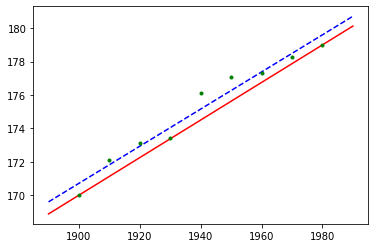

In [27]:
# Visualize the line together with data points.

# Calculate two points on the line
x_coordinates = [1890, 1990]
y_coordinates = []
for year in x_coordinates:
    y_coordinates.append(m1 * year + b1)

plt.plot(x_coordinates, y_coordinates, "r-")

y_coordinates = []
for x in x_coordinates:
  y = m3 * x + b3
  y_coordinates.append(y)

print(y_coordinates)
plt.plot(x_coordinates, y_coordinates, "b--")
plt.plot(years, heights, "g.")

Question: Which line is a better fit of the data set? What measure should we use?

## 8. Model Evaluation

A straight-forward idea of model evaluation is to sum up all errors made by the model. For example:

- Let $x^{(i)}$ and $y^{(i)}$ to represent the x and y coordiante of the $i$th record
- Let $n$ denote the total number of records.
- Let $Y = mX + b$ be the model.

Then:
- The model's prediction on Record i is $mx^{(i)} + b$
- The actual target value on Record i is $y^{(i)}$
- The error made on this record is $mx^{(i)} + b - y^{(i)}$.

We would like to use the sum of all these error as an evaluation of the model's performance. However, we don't want positive errors to cancel with negative errors. There are two common solutions:

*The Mean-Absolute-Error (MAE)*: To sum up the absolute values of all errors.

$$
MAE = \frac{|mx^{(0)} + b - y^{(0)}| + |mx^{(1)} + b - y^{(1)}| + ... + |mx^{(n-1)} + b - y^{(n-1)}|}{n} = \frac{\sum_{i=0}^{n-1}|mx^{(i)} + b - y^{(i)}|}{n}
$$

*The Mean-Squared-Error (MSE)*: To sum up the square of all errors

$$
MSE = \frac{(mx^{(0)} + b - y^{(0)})^2 + (mx^{(1)} + b - y^{(1)})^2 + ... + (mx^{(n-1)} + b - y^{(n-1)})^2}{n} = \frac{\sum_{i=0}^{n-1}(mx^{(i)} + b - y^{(i)})^2}{n}
$$


- Objective: find a linear model whose predictions are *close* to the actual values.
- Metric on closeness: **mean square error (MSE):**
$$MSE = \frac{1}{\textit{number of data}}\sum_{\text{(x, y) in dataset}}(mx + b - y)^2$$

Now that we have multiple model candidates, which one gives the smallest MSE?

In [28]:
# Example: Calculate the error for 1930

# Red line: height = m1 * year + b1
# Blue line: height = m3 * year + b3

# What is the red model's error on 1930?
m1 * 1930 + b1 - data.loc[1930, "Height(cm)"]

-0.025000000000005684

In [29]:
# Print the red model's error on every year
for year in years:
  error = m1 * year + b1 - data.loc[year, "Height(cm)"]
  print(year, error)

1900 0.0
1910 -0.9749999999999943
1920 -0.8499999999999943
1930 -0.025000000000005684
1940 -1.5999999999999943
1950 -1.4749999999999943
1960 -0.5500000000000114
1970 -0.42500000000001137
1980 0.0


In [30]:
# The blue model's errors:
for year in years:
  error = m3 * year + b3 - data.loc[year, "Height(cm)"]
  print(year, error)

1900 0.7088888888888789
1910 -0.2794444444444366
1920 -0.16777777777778624
1930 0.6438888888888812
1940 -0.9444444444444287
1950 -0.8327777777777783
1960 0.07888888888888346
1970 0.19055555555553383
1980 0.602222222222224


In [ ]:
# Calculate errors for each year

total_error = 0 # we use snake casing to name variables and functions

for year in data.index:

    error = (m2 * year + b2 - data.loc[year, "Height(cm)"]) ** 2
    # print(year, error)
    total_error += error

print("MSE for the red line:", total_error/len(data)) # len() returns the number of rows when applied to a data frame


In [ ]:
# How about the MSE for the blue line?
# height = m1 * year + b1

total_error = 0

for year in data.index:
    error = (m1 * year + b1 - data.loc[year, "Height(cm)"]) ** 2
    total_error += error

print("MSE for the blue line:", total_error/len(data))

## 9: Use the Model
- At what rate is US men's height growing?

Answer: The slope of our model represents the rate of change on height. So US men's height is grow by 0.1125 cm per year.

- What is your prediction on the average height in 1890?, 2000? 2050?

Answer: we can apply our model to these years:
    - Prediction on 1890: 0.1125 * 1890 - 43
    - Prediction on 2000: 0.1125 * 2000 - 43
    - Prediction on 2050: 0.1125 * 2505 - 43
    
- Check with the raw dataset and see if your 1890 prediction is close.

The model suggests a steady growth of height during 1900 and 1980. However, it is unlikely to keep this rate forever. So its prediction far into the future can be unreliable.